In [1]:
import numpy as np
from matplotlib import pyplot as plt

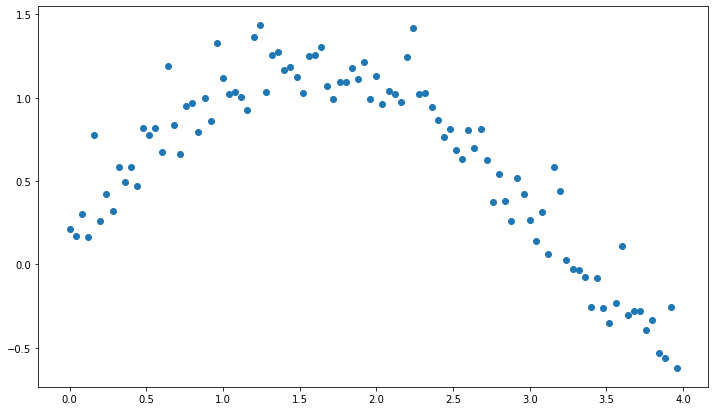

In [42]:
# Creating and plotting data
x = np.arange(0, 4, 0.04)
y = np.sin(x)
perm = np.random.permutation(x.shape[0])
perm_1 = perm[0: int(3* x.shape[0]/4) + 1]
perm_2 = perm[int(3* x.shape[0]/4) + 1: ]
noise = np.random.rand(x.shape[0])
for i in perm_1:
    y[i] = y[i] + 0.3 * noise[i]
for i in perm_2:
    y[i] = y[i] + 0.7 * noise[i]
plt.figure(figsize=(12, 7))
plt.scatter(x, y)
plt.show()

In [49]:
# Ordinary Least Squares
ones = np.ones((x.shape[0], 1))
x = x.reshape((x.shape[0], 1))
nx = np.concatenate((ones, x), axis=1)
y = y.reshape((y.shape[0], 1))
beta = (np.linalg.inv((np.transpose(nx)).dot(nx))).dot((np.transpose(nx)).dot(y))
lr = nx.dot(beta)

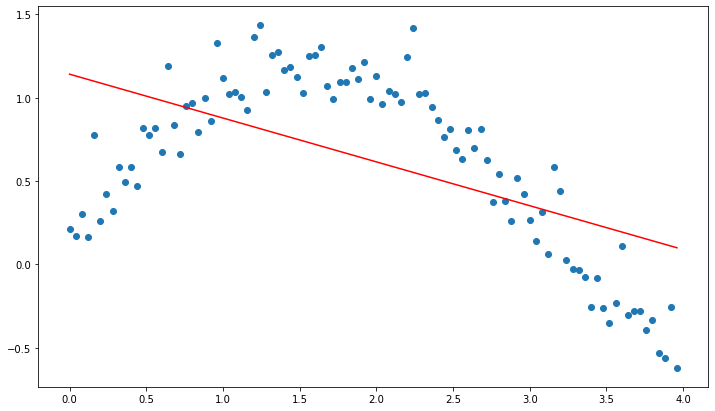

In [50]:
# Plotting OLS
plt.figure(figsize=(12, 7))
plt.scatter(x, y)
plt.plot(x, lr, color='r')
plt.show()

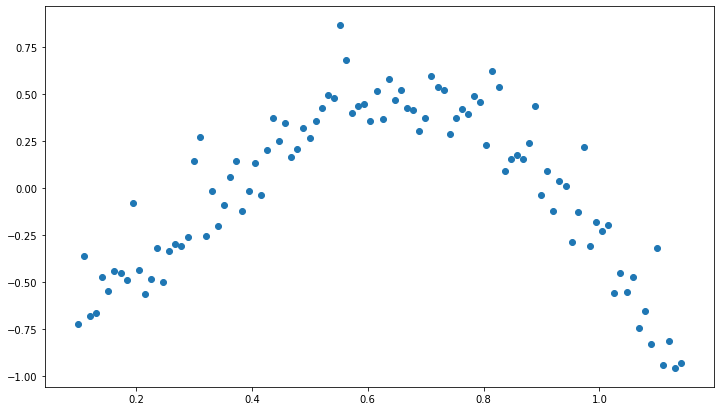

In [53]:
# Plotting standardized residuals
residuals = y - lr
mean_residual = np.mean(residuals)
std_residuals = residuals - mean_residual
plt.figure(figsize=(12, 7))
plt.scatter(lr, std_residuals)
plt.show()

In [79]:
# Weighted Least Squares
ones = np.ones((x.shape[0], 1))
x = x.reshape((x.shape[0], 1))
nx = np.concatenate((ones, x), axis=1)
y = y.reshape((y.shape[0], 1))
beta = (np.linalg.inv((np.transpose(nx)).dot(nx))).dot((np.transpose(nx)).dot(y))
lr = nx.dot(beta)

residuals = lr - y
sqrd_residuals = np.power(residuals, 2)
gamma = (np.linalg.inv((np.transpose(nx)).dot(nx))).dot((np.transpose(nx)).dot(sqrd_residuals))
sigma = np.sqrt(nx.dot(gamma))
wlr = lr * sigma

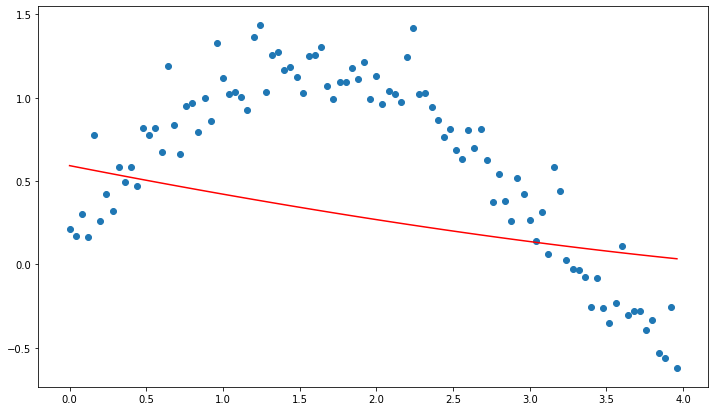

In [80]:
# Plotting WLS
plt.figure(figsize=(12, 7))
plt.scatter(x, y)
plt.plot(x, wlr, color='r')
plt.show()

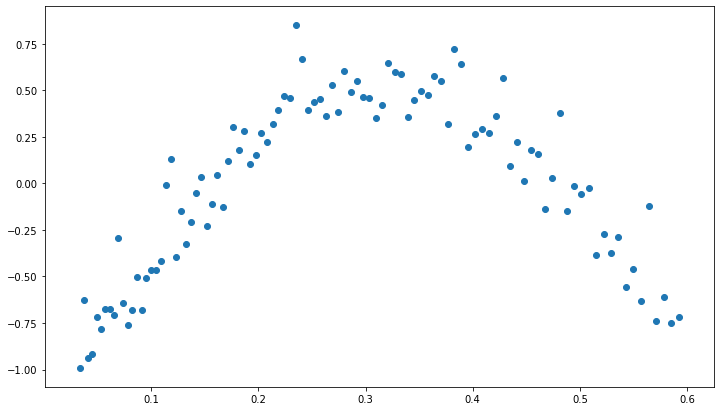

In [81]:
# Plotting standardized residuals
residuals = y - wlr
mean_residual = np.mean(residuals)
std_residuals = residuals - mean_residual
plt.figure(figsize=(12, 7))
plt.scatter(wlr, std_residuals)
plt.show()